## ACKNOWLEDGMENT

Chat Generative Pre-trained Transformer 4o (OpenAI) was used for writing assistance by providing feedback on language and text structure, which was subsequently revised by critical appraisal from the author.

Statistics Table:
      BLEU Score   ROUGE-1    BLEURT
mean    0.009524  0.145535  0.308142
min     0.000000  0.000000  0.002431
max     0.177581  0.695652  0.678174
std     0.009977  0.081341  0.058387


/var/folders/2g/tztrhwks5s9_4gycqxprdgfc0000gn/T/ipykernel_16603/1938593773.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.index, y=mean_scores.values, palette="viridis")


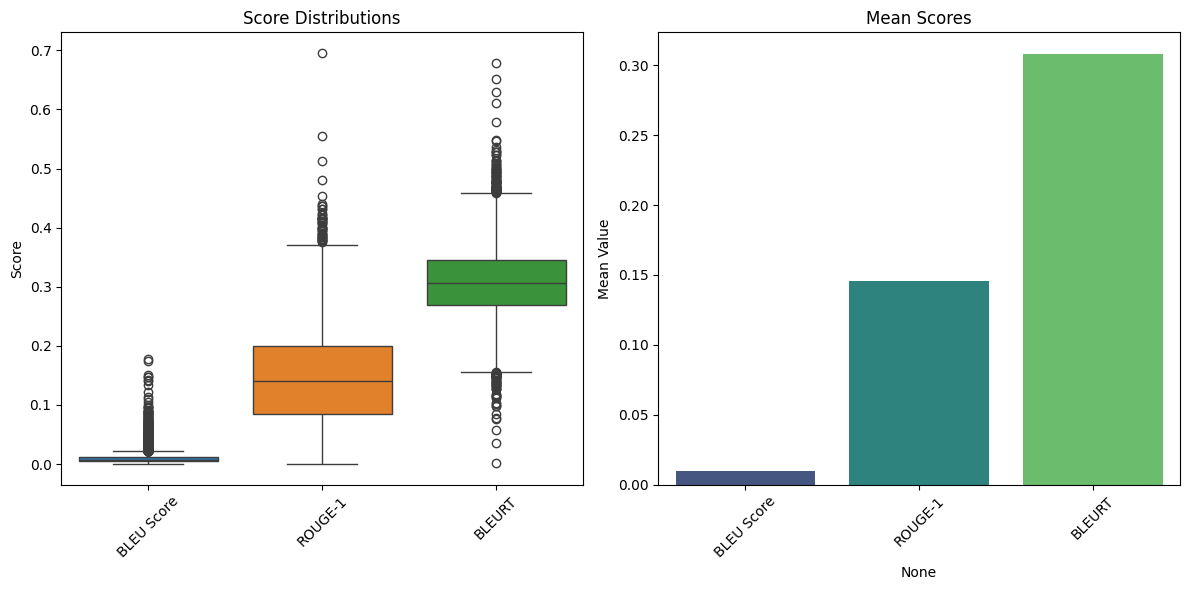

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a Pandas DataFrame
file_path = "llavaScores.csv"
df = pd.read_csv(file_path)

# Select the score columns
score_columns = ["BLEU Score", "ROUGE-1", "BLEURT"]

# Calculate statistics
stats = df[score_columns].describe().loc[["mean", "min", "max", "std"]]
print("Statistics Table:")
print(stats)

# Plot visualizations
plt.figure(figsize=(12, 6))

# Boxplot for score distributions
plt.subplot(1, 2, 1)
sns.boxplot(data=df[score_columns])
plt.title("Score Distributions")
plt.ylabel("Score")
plt.xticks(rotation=45)

# Bar plot for mean scores
plt.subplot(1, 2, 2)
mean_scores = df[score_columns].mean()
sns.barplot(x=mean_scores.index, y=mean_scores.values, palette="viridis")
plt.title("Mean Scores")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

Statistics Table:
          BLEU   ROUGE-1    BLEURT
mean  0.009271  0.114767  0.255688
min   0.000000  0.000000  0.008100
max   0.193385  0.490566  0.552820
std   0.010015  0.086627  0.067970


/var/folders/2g/tztrhwks5s9_4gycqxprdgfc0000gn/T/ipykernel_16603/1187521436.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.index, y=mean_scores.values, palette="viridis")


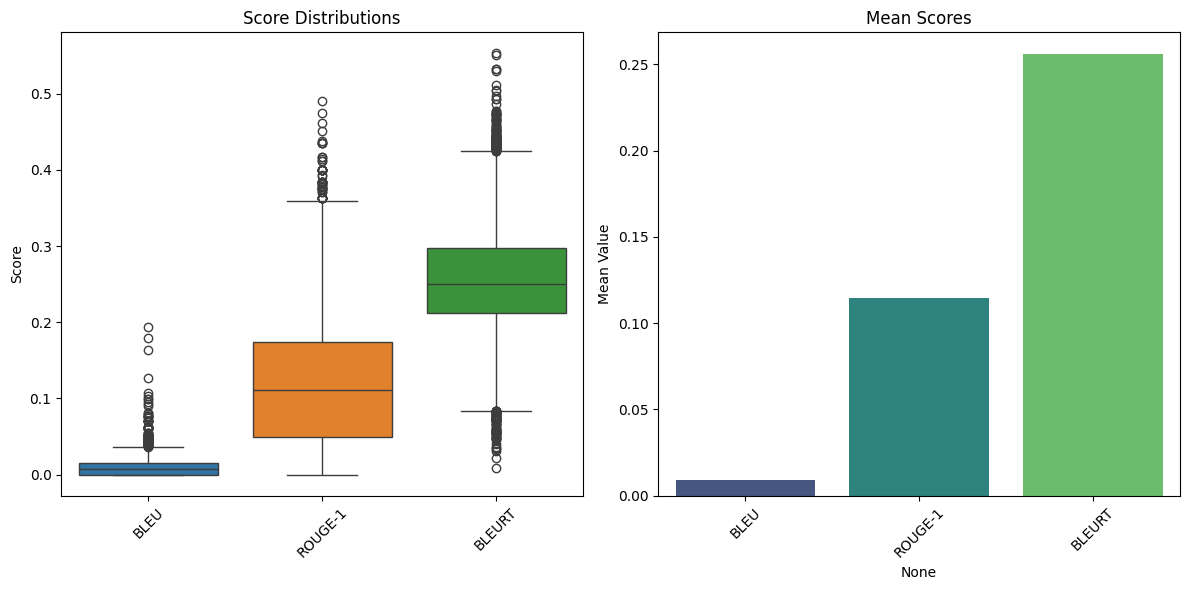

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a Pandas DataFrame
file_path = "randomForestScores.csv"
df = pd.read_csv(file_path)

# Select the score columns
score_columns = ["BLEU", "ROUGE-1", "BLEURT"]

# Calculate statistics
stats = df[score_columns].describe().loc[["mean", "min", "max", "std"]]
print("Statistics Table:")
print(stats)

# Plot visualizations
plt.figure(figsize=(12, 6))

# Boxplot for score distributions
plt.subplot(1, 2, 1)
sns.boxplot(data=df[score_columns])
plt.title("Score Distributions")
plt.ylabel("Score")
plt.xticks(rotation=45)

# Bar plot for mean scores
plt.subplot(1, 2, 2)
mean_scores = df[score_columns].mean()
sns.barplot(x=mean_scores.index, y=mean_scores.values, palette="viridis")
plt.title("Mean Scores")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

Statistics Table:
              BLEU Score   ROUGE-1    BLEURT BLEU Score ROUGE-1    BLEURT  \
                    mean      mean      mean        min     min       min   
Model                                                                       
LLaVA           0.009524  0.145535  0.308142        0.0     0.0  0.002431   
Random Forest   0.009271  0.114767  0.255688        0.0     0.0  0.008100   

              BLEU Score   ROUGE-1    BLEURT BLEU Score   ROUGE-1    BLEURT  
                     max       max       max        std       std       std  
Model                                                                        
LLaVA           0.177581  0.695652  0.678174   0.009977  0.081341  0.058387  
Random Forest   0.193385  0.490566  0.552820   0.010015  0.086627  0.067970  


/var/folders/2g/tztrhwks5s9_4gycqxprdgfc0000gn/T/ipykernel_16603/1248408873.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="Model", y="BLEU Score", palette="Set2")


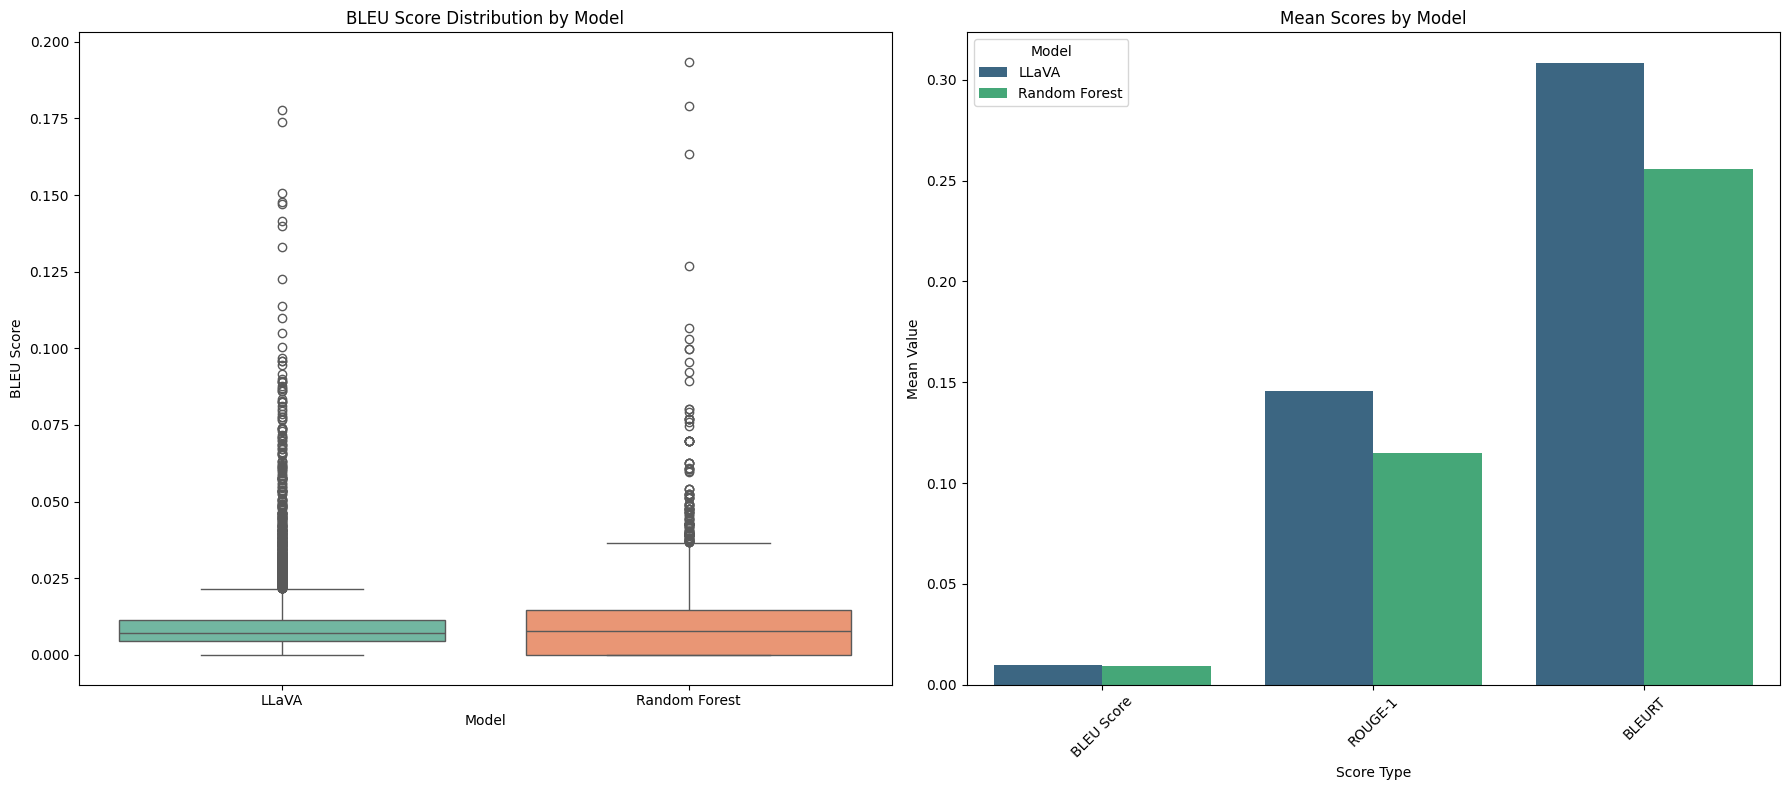

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files into DataFrames
llava_file = "llavaScores.csv"
rf_file = "randomForestScores.csv"

llava_df = pd.read_csv(llava_file)
rf_df = pd.read_csv(rf_file)

# Rename the BLEU column in randomForestScores to match llavaScores
rf_df.rename(columns={"BLEU": "BLEU Score"}, inplace=True)

# Select the score columns
score_columns = ["BLEU Score", "ROUGE-1", "BLEURT"]

# Add a model identifier column to each DataFrame
llava_df["Model"] = "LLaVA"
rf_df["Model"] = "Random Forest"

# Combine the two DataFrames for comparison
combined_df = pd.concat([llava_df[score_columns + ["Model"]], rf_df[score_columns + ["Model"]]])

# Calculate statistics for each model
stats = combined_df.groupby("Model")[score_columns].describe().loc[:, (slice(None), ["mean", "min", "max", "std"])]
print("Statistics Table:")
print(stats)

# Plot visualizations
plt.figure(figsize=(18, 8))

# Boxplot for score distributions by model
plt.subplot(1, 2, 1)
sns.boxplot(data=combined_df, x="Model", y="BLEU Score", palette="Set2")
plt.title("BLEU Score Distribution by Model")
plt.ylabel("BLEU Score")

# Bar plot for mean scores by model
plt.subplot(1, 2, 2)
mean_scores = combined_df.groupby("Model")[score_columns].mean().reset_index()
mean_scores_melted = mean_scores.melt(id_vars="Model", var_name="Score Type", value_name="Mean Score")
sns.barplot(data=mean_scores_melted, x="Score Type", y="Mean Score", hue="Model", palette="viridis")
plt.title("Mean Scores by Model")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()